In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

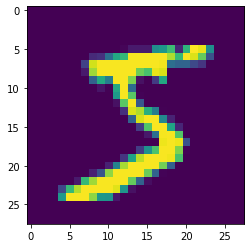

In [8]:
plt.imshow(X_train[0])

In [9]:
X_train = X_train/255

In [10]:
X_test = X_test/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [12]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [13]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation= 'relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation= 'relu'))  
decoder.add(Dense(784, activation= 'sigmoid'))
decoder.add(Reshape([28,28]))

In [14]:
autoencoder = Sequential([encoder, decoder])

In [15]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer=SGD(lr=1.5),
                   metrics = ['accuracy'])

In [16]:
# autoencoder.fit(X_train, X_train, epochs=5,
#                validation_data=[X_test, X_test])

In [17]:
passed_images = autoencoder.predict(X_test[:10])

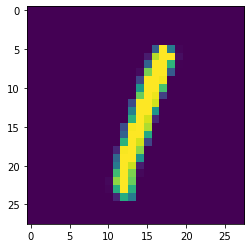

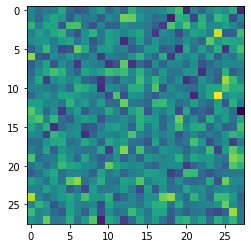

In [18]:
n=5

plt.imshow(X_test[n])
plt.show()
plt.imshow(passed_images[n]) 

In [19]:
from tensorflow.keras.layers import GaussianNoise

In [20]:
sample = GaussianNoise(0.2)

In [23]:
# noisey = sample(X_test[0:2],training=True)

Oringinal


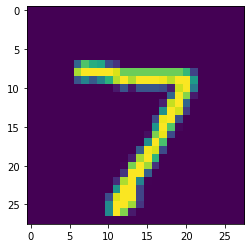

In [26]:
n =0 
print("Oringinal")
plt.imshow(X_test[n])
plt.show()
# print("Noise")
# plt.imshow(noisey[n])
# plt.show()

In [27]:
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [28]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation= 'relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation= 'relu'))  
decoder.add(Dense(784, activation= 'sigmoid'))
decoder.add(Reshape([28,28]))

In [29]:
noise_remover = Sequential([encoder, decoder])

In [31]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [32]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
60000/60000 [==============================] - 27s 454us/sample - loss: 0.1698 - accuracy: 0.8007
Epoch 2/8
60000/60000 [==============================] - 29s 482us/sample - loss: 0.1282 - accuracy: 0.8083
Epoch 3/8
60000/60000 [==============================] - 26s 426us/sample - loss: 0.1205 - accuracy: 0.8096
Epoch 4/8
60000/60000 [==============================] - 26s 425us/sample - loss: 0.1154 - accuracy: 0.8105
Epoch 5/8
60000/60000 [==============================] - 26s 431us/sample - loss: 0.1116 - accuracy: 0.8111
Epoch 6/8
60000/60000 [==============================] - 27s 452us/sample - loss: 0.1091 - accuracy: 0.8115-
Epoch 7/8
60000/60000 [==============================] - 28s 467us/sample - loss: 0.1069 - accuracy: 0.8118- loss: 0.1069 - accuracy: 0.81
Epoch 8/8
60000/60000 [==============================] - 34s 569us/sample - loss: 0.1051 - accuracy: 0.8121-


In [34]:
# ten_noisy_images = sample(X_test[:10], training=True)

In [36]:
# denoised = noise_remover(ten_noisy_images)

ORIGINAL IMAGE


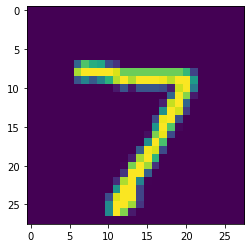

NOISE ADDED IMAGE


NameError: name 'ten_noisy_images' is not defined

In [37]:
n=0
print("ORIGINAL IMAGE")
plt.imshow(X_test[n])
plt.show()

print("NOISE ADDED IMAGE")
plt.imshow(ten_noisy_images[n])
plt.show()

print("AFTER NOISE REMOVER FROM AUTOENCODER")
plt.imshow(denoised[n])
plt.show()